In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Python_for_Data_Science_and_Machine_Learning/Machine_Learning/Neural_Nets_Deep_Learning

Mounted at /content/gdrive
/content/gdrive/My Drive/Python_for_Data_Science_and_Machine_Learning/Machine_Learning/Neural_Nets_Deep_Learning


In [3]:
df = pd.read_csv('./Data/cancer_classification.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


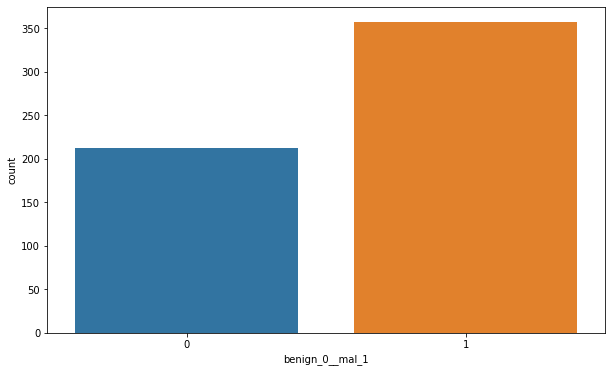

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='benign_0__mal_1', data=df)

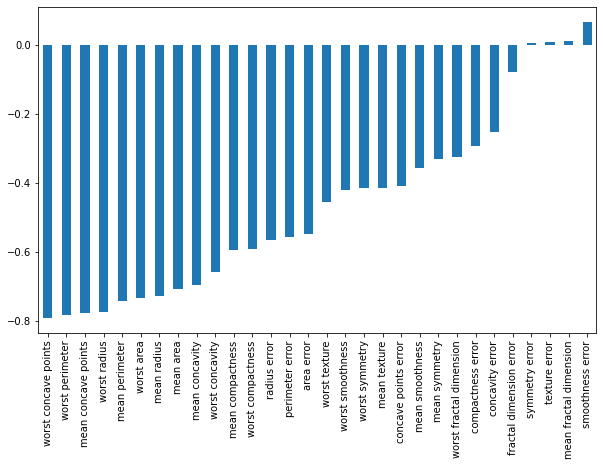

In [14]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar', figsize=(10, 6))

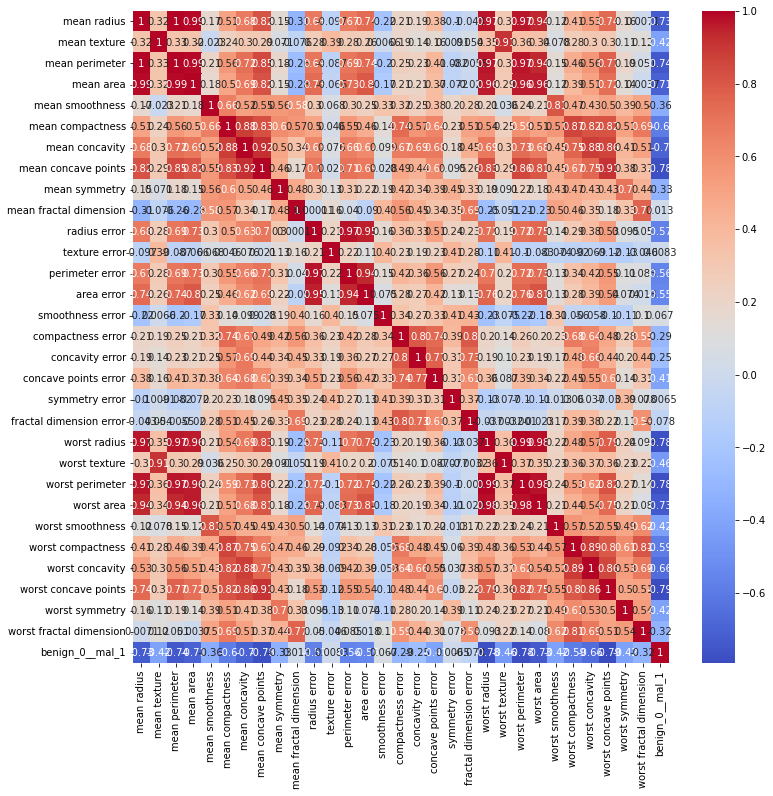

In [20]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [21]:
X = df.drop('benign_0__mal_1', axis=1)

In [22]:
y = df['benign_0__mal_1'].values

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
X_train = scaler.fit_transform(X_train)

In [31]:
X_test = scaler.transform(X_test)

In [32]:
from tensorflow.keras.models import Sequential

In [33]:
from tensorflow.keras.layers import Dense, Dropout

In [34]:
X_train.shape

(426, 30)

In [37]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

#BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [39]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 2s 60ms/step - loss: 0.6675 - val_loss: 0.6548
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6338 - val_loss: 0.6201
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5955 - val_loss: 0.5780
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5558 - val_loss: 0.5360
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5157 - val_loss: 0.4942
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4747 - val_loss: 0.4518
Epoch 7/600
14/14 [==============================] - 0s 9ms/step - loss: 0.4354 - val_loss: 0.4087
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3953 - val_loss: 0.3698
Epoch 9/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3561 - val_loss: 0.3286
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3252 - val_loss: 0.2970
Epoch 11

In [40]:
losses = pd.DataFrame(model.history.history)

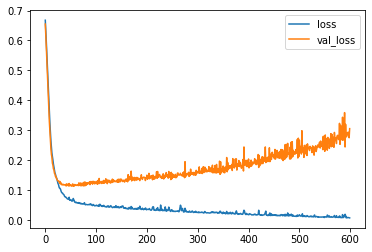

In [41]:
losses.plot()

In [42]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

#BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
#help(EarlyStopping)

In [47]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [48]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 22ms/step - loss: 0.6710 - val_loss: 0.6444
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6309 - val_loss: 0.6075
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5940 - val_loss: 0.5697
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5572 - val_loss: 0.5286
Epoch 5/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5113 - val_loss: 0.4817
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4647 - val_loss: 0.4354
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4194 - val_loss: 0.3881
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3732 - val_loss: 0.3377
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3253 - val_loss: 0.2933
Epoch 10/600
14/14 [==============================] - 0s 7ms/step - loss: 0.2878 - val_loss: 0.2595
Epoch 1

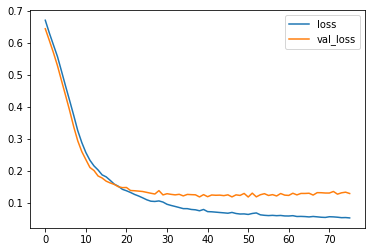

In [49]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [50]:
from tensorflow.keras.layers import Dropout

In [51]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

#BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [52]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.7782 - val_loss: 0.7077
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.7223 - val_loss: 0.6728
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.7011 - val_loss: 0.6531
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6548 - val_loss: 0.6372
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6459 - val_loss: 0.6212
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6156 - val_loss: 0.5995
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6038 - val_loss: 0.5664
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5881 - val_loss: 0.5253
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5587 - val_loss: 0.4865
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5238 - val_loss: 0.4524
Epoch 11

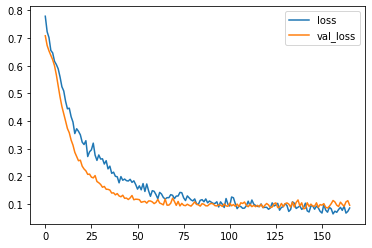

In [53]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [64]:
predict_classes = (model.predict(X_test) > 0.5).astype("int32")

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

In [66]:
print(classification_report(y_test, predict_classes))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [67]:
print(confusion_matrix(y_test, predict_classes))

[[54  1]
 [ 2 86]]
